# **MLP PROJECT**

# **CrimeCast: Forecasting Crime Categories**

Student Name- Sarthak Singh Gaur

Roll No- 21f3001936

Course- CS2008P

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

**Loading Datasets**

In [2]:
data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
data.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [4]:
data.shape

(20000, 22)

In [5]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [7]:
data.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [8]:
data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


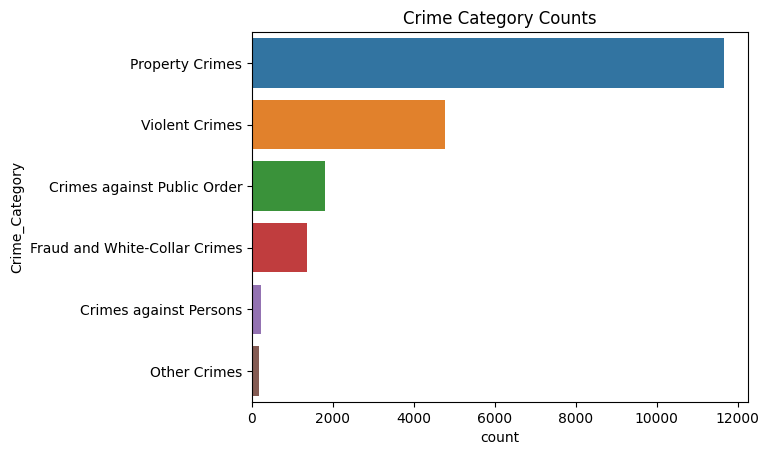

In [9]:
sns.countplot(y='Crime_Category', data=data, order=data['Crime_Category'].value_counts().index)
plt.title('Crime Category Counts')
plt.show()

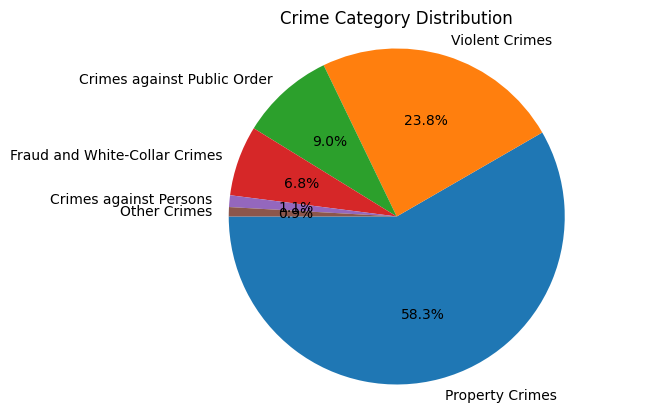

In [10]:
values = pd.Series(data['Crime_Category'])
v_counts = values.value_counts()
fig, ax = plt.subplots()
ax.pie(v_counts, labels=v_counts.index, autopct='%1.1f%%', startangle=180)
ax.axis('equal')
plt.title("Crime Category Distribution")
plt.show()

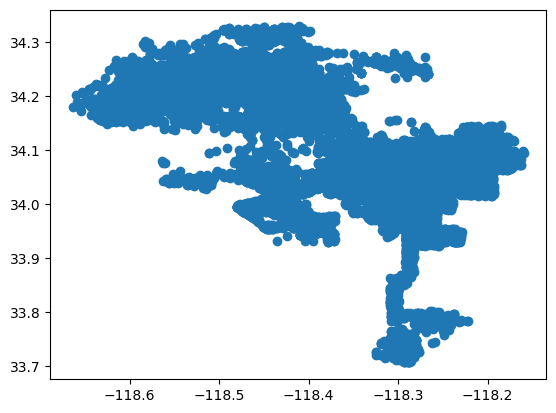

In [11]:
lati= data["Latitude"].copy()
longi = data["Longitude"].copy()
lati = lati.replace(0,np.nan)
longi = longi.replace(0,np.nan)
plt.scatter(longi,lati)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


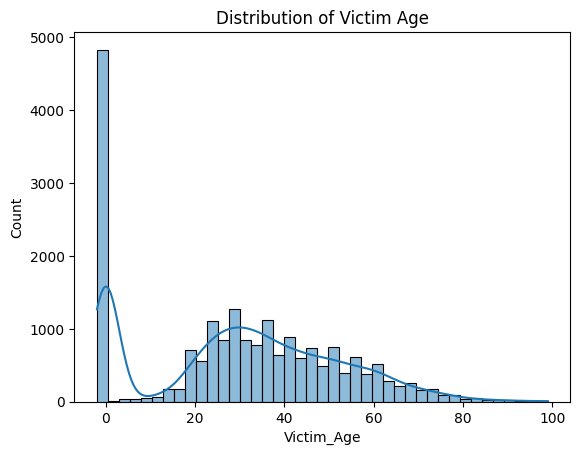

In [12]:
sns.histplot(data['Victim_Age'].dropna(), kde=True)
plt.title('Distribution of Victim Age')
plt.show()

<Axes: title={'center': 'Victim_Age'}>

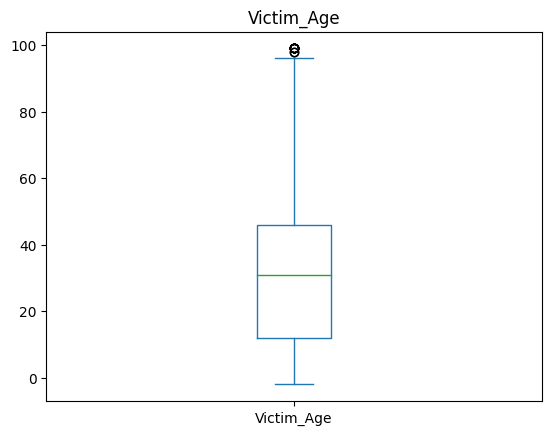

In [13]:
data['Victim_Age'].plot(kind="box", title="Victim_Age")

In [14]:
numerical_columns = ['Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


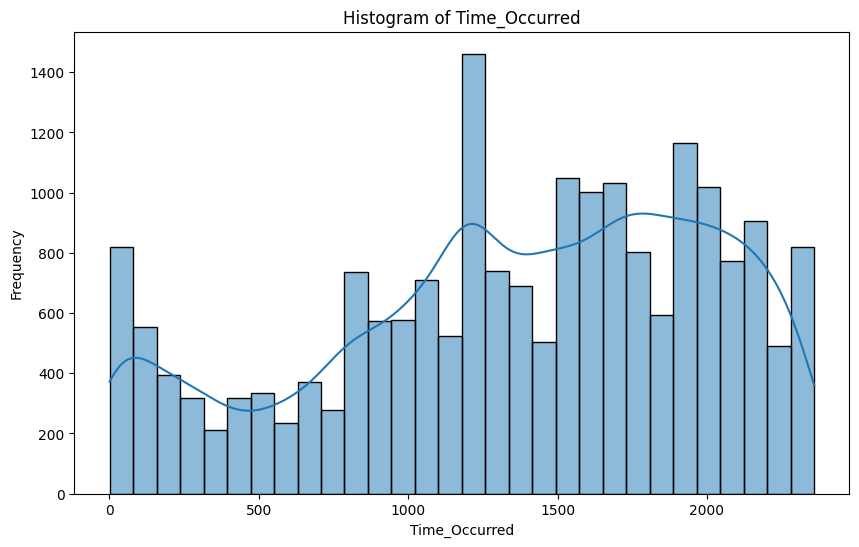

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


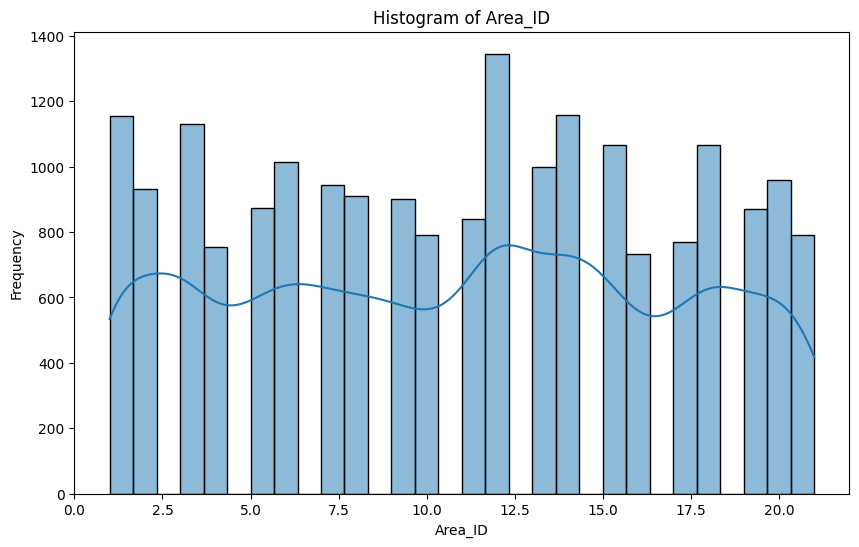

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


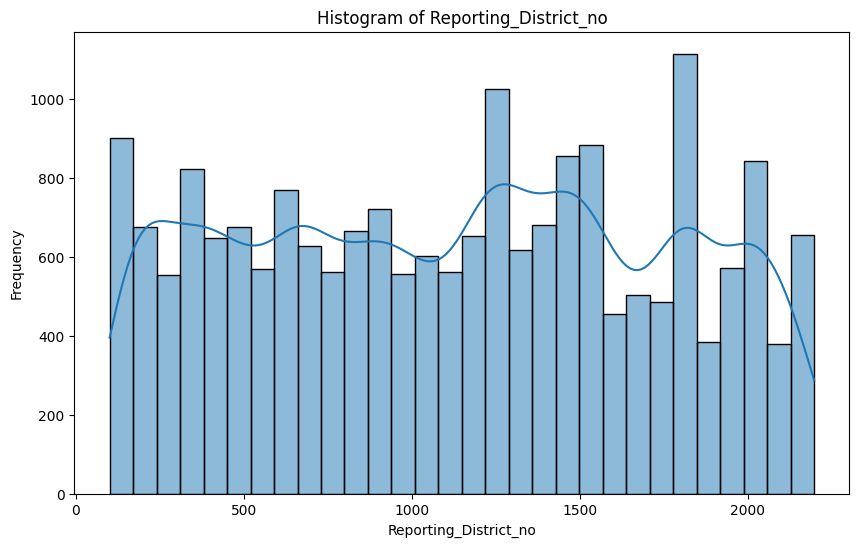

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


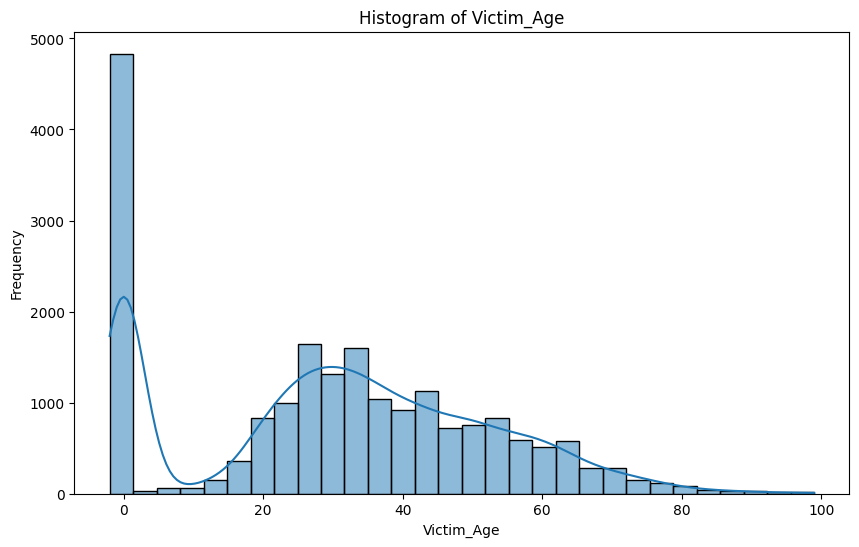

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


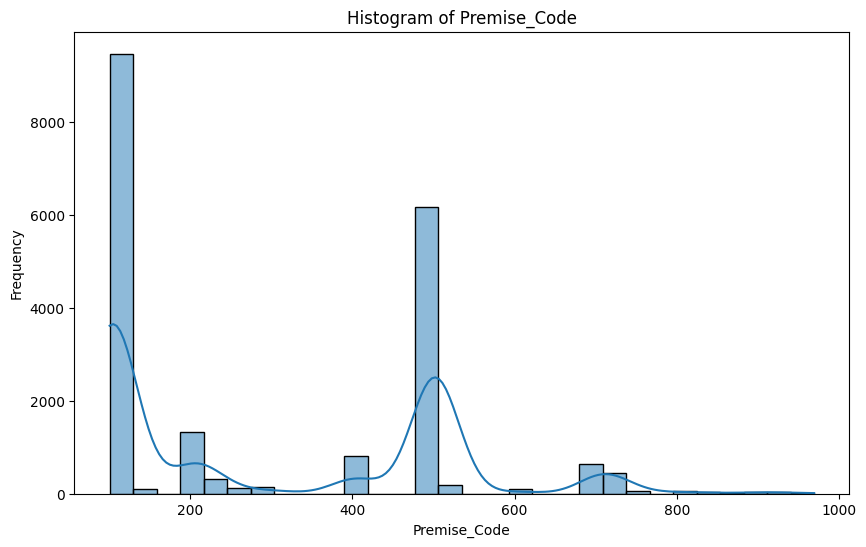

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


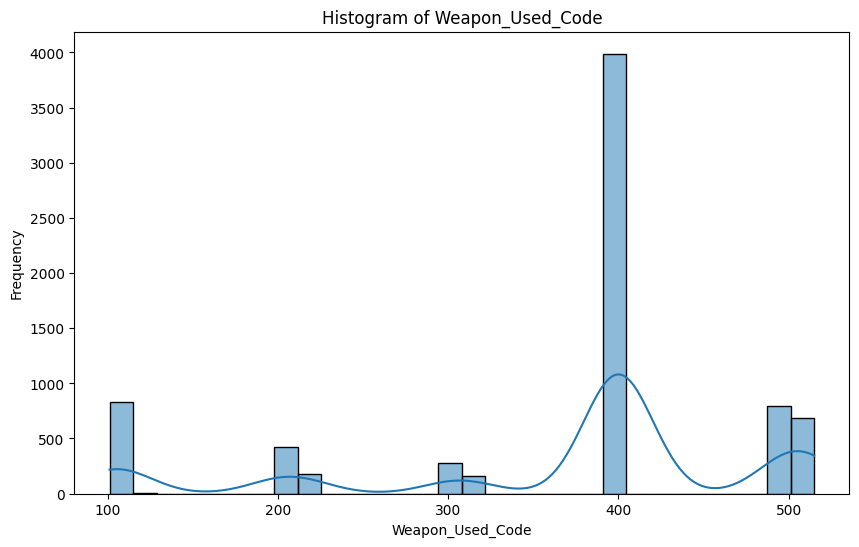

In [15]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

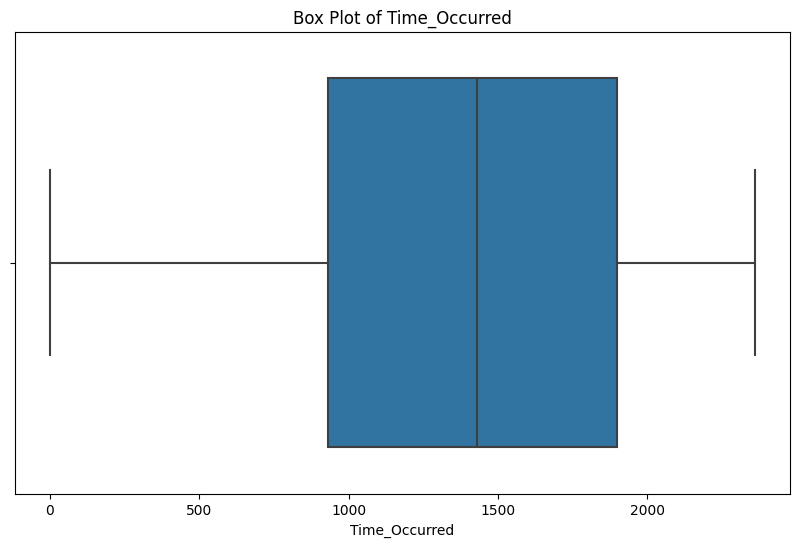

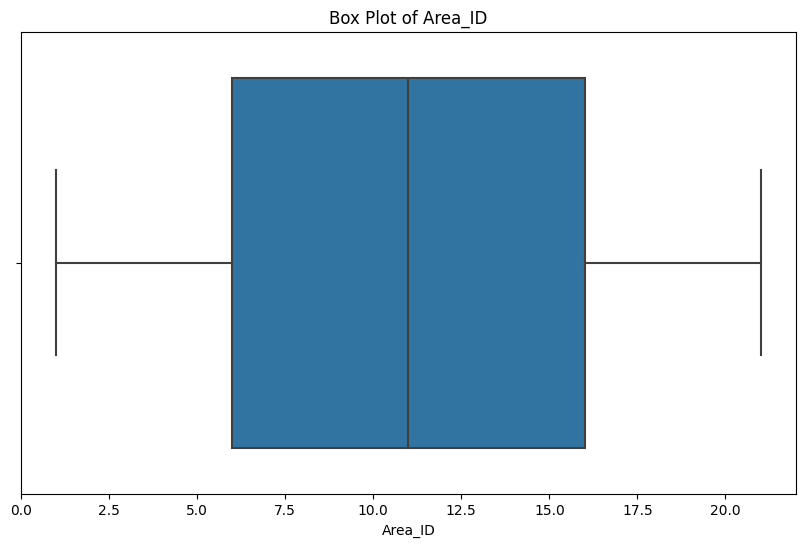

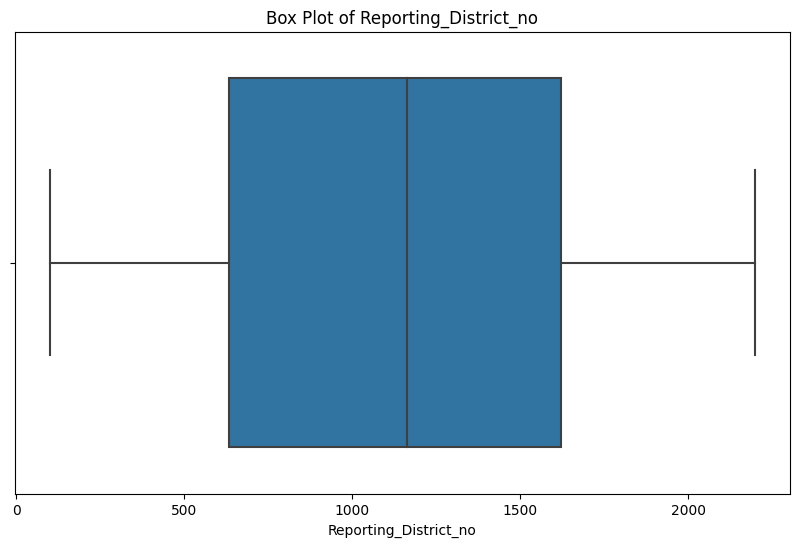

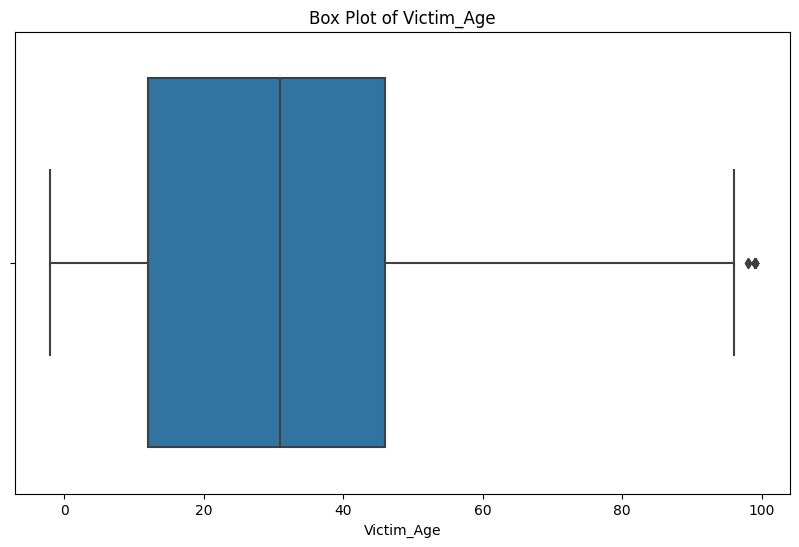

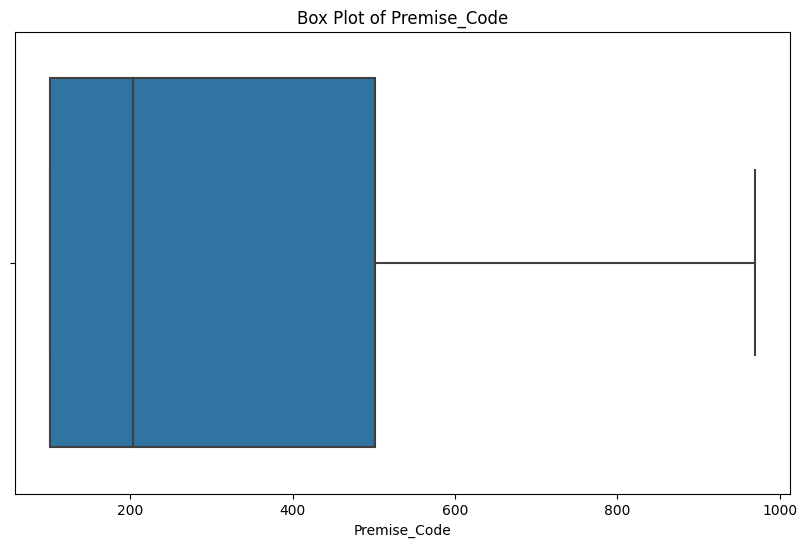

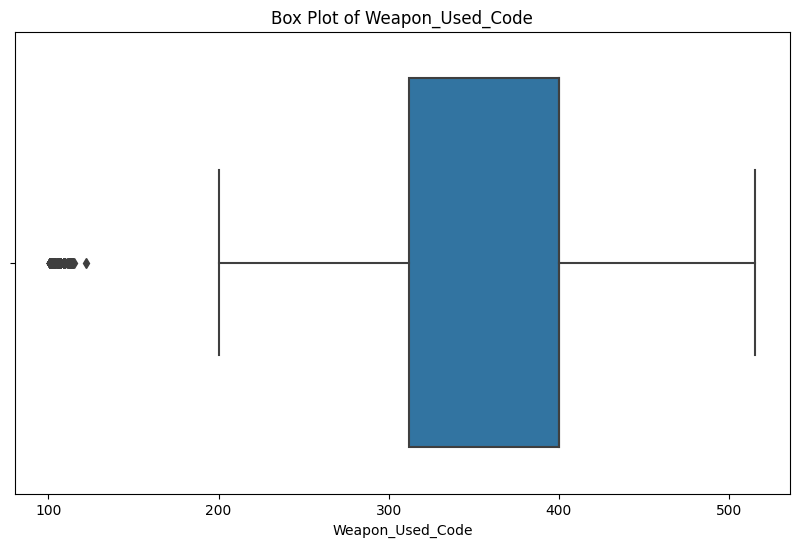

In [16]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

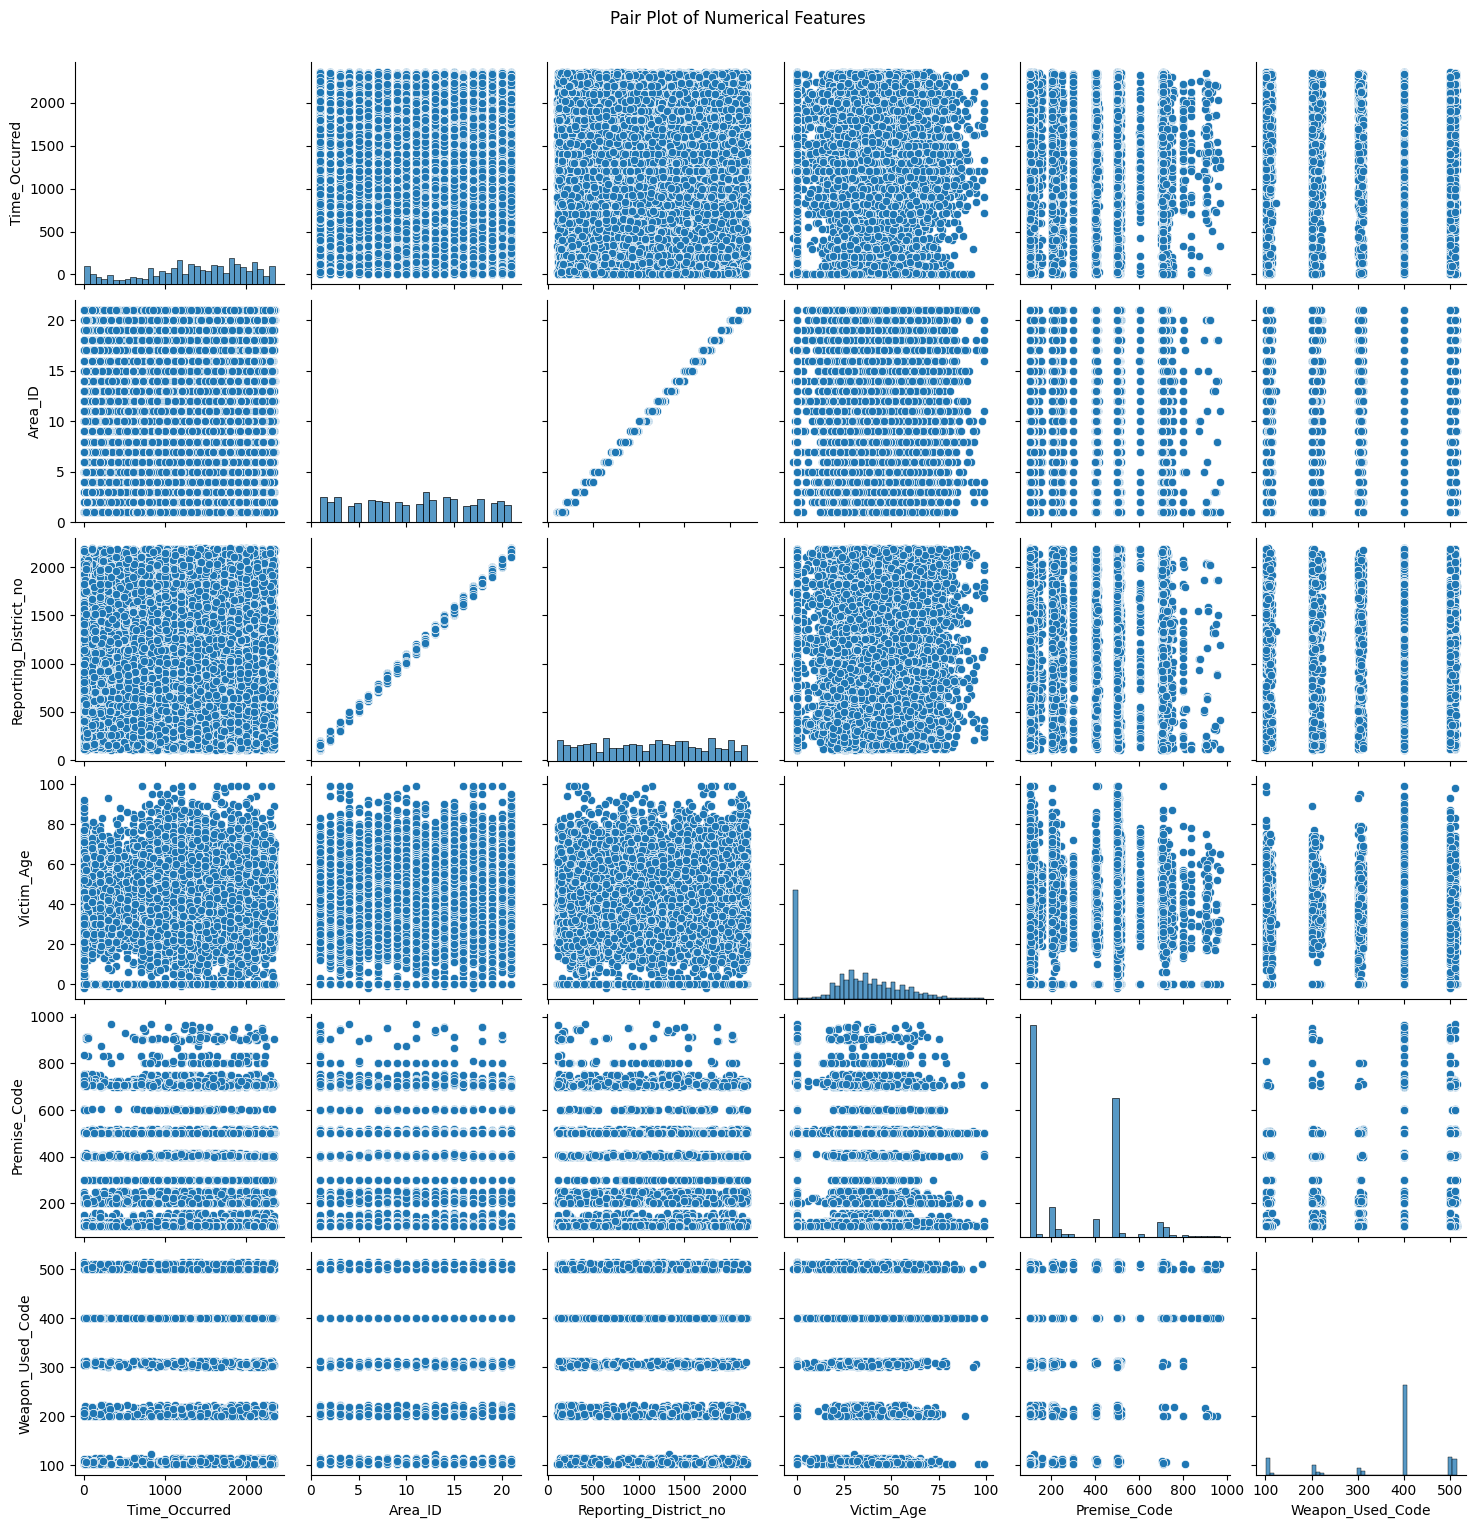

In [17]:
numerical_columns1 = ['Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code']
sns.pairplot(data[numerical_columns1])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

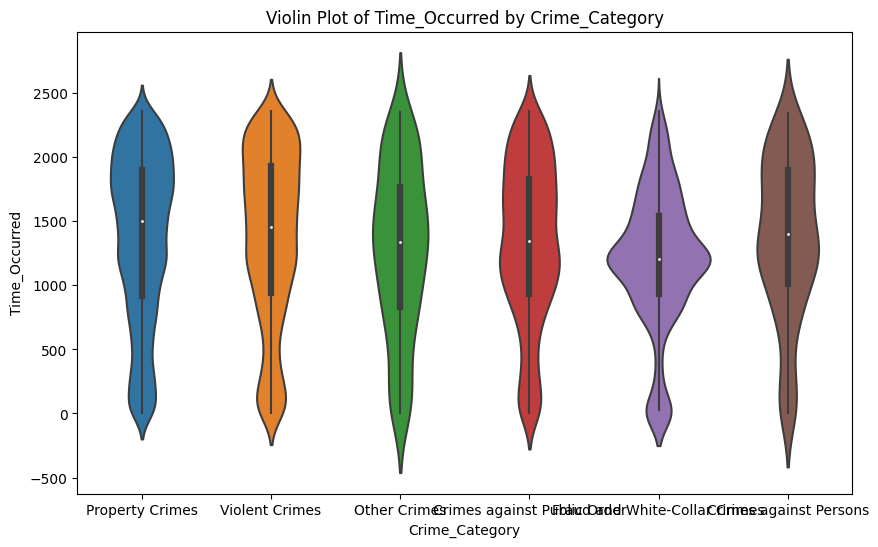

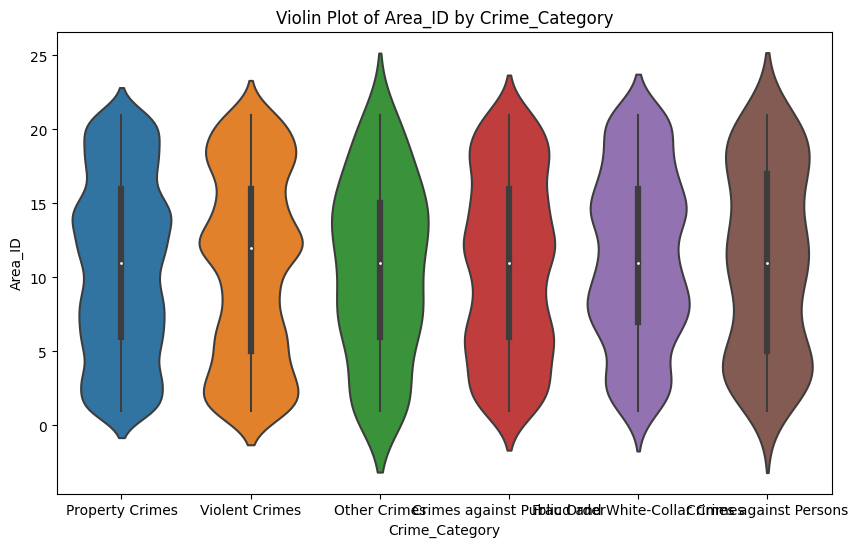

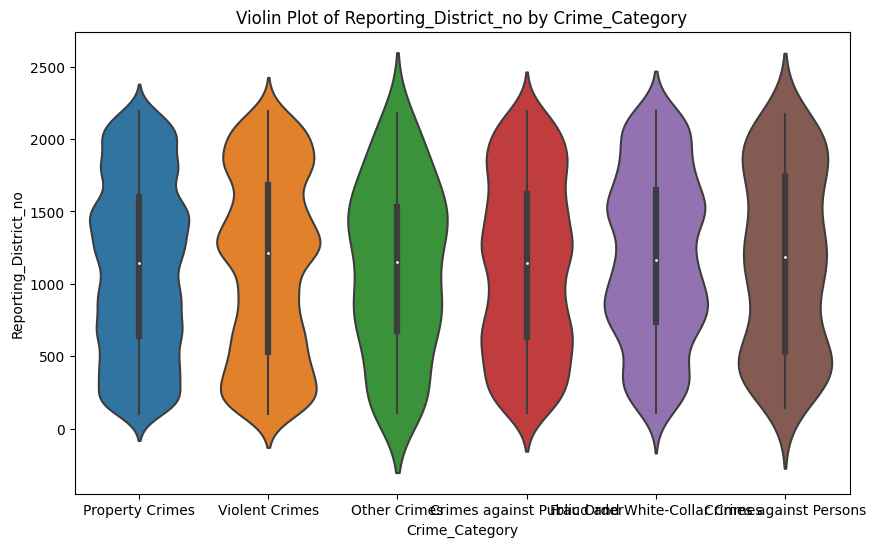

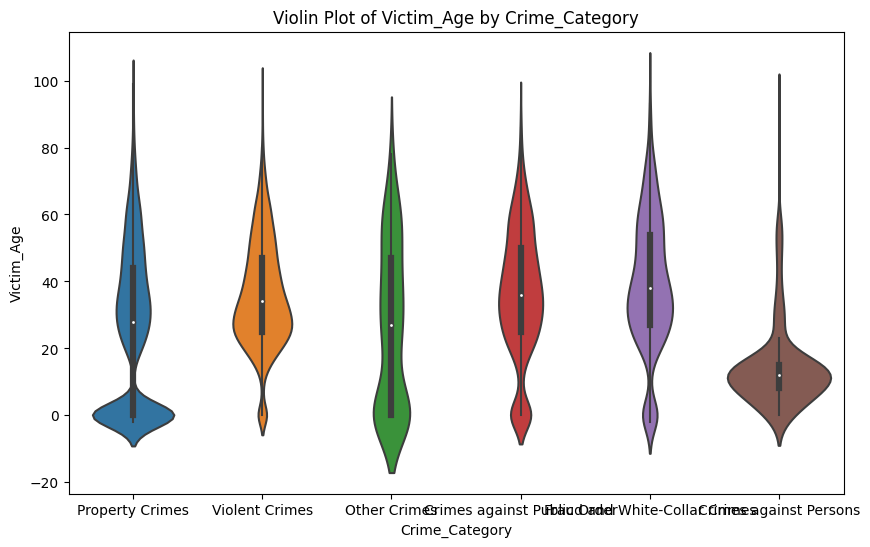

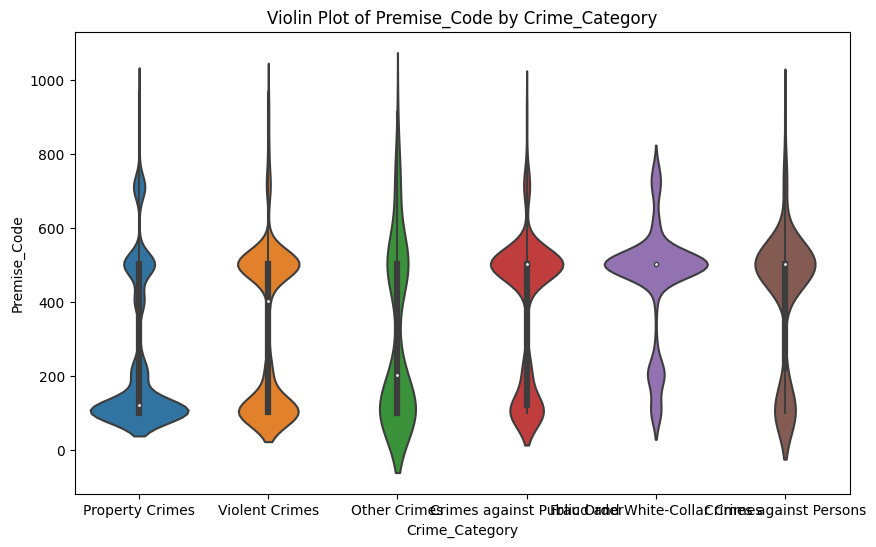

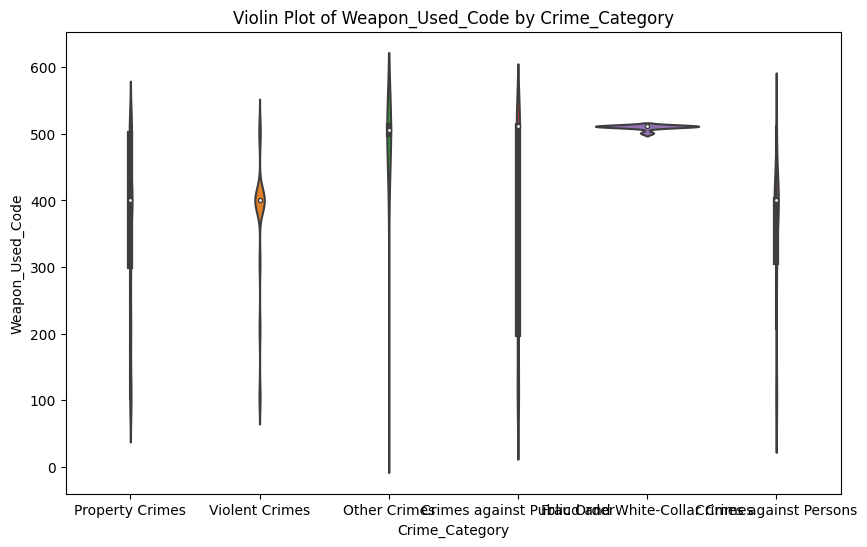

In [18]:
categorical_feature = 'Crime_Category'

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[categorical_feature], y=data[column])
    plt.title(f'Violin Plot of {column} by {categorical_feature}')
    plt.xlabel(categorical_feature)
    plt.ylabel(column)
    plt.show()

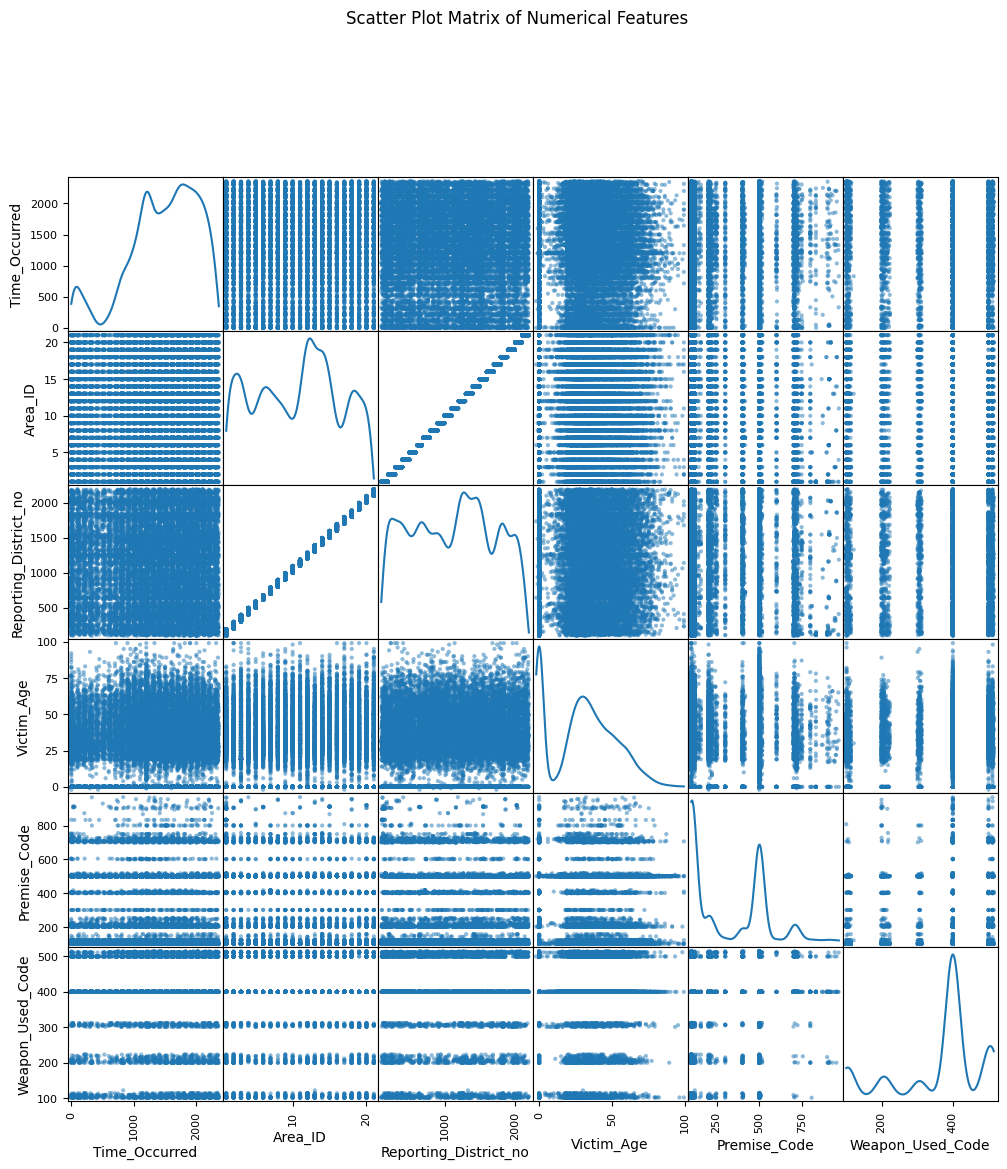

In [19]:
pd.plotting.scatter_matrix(data[numerical_columns], figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()

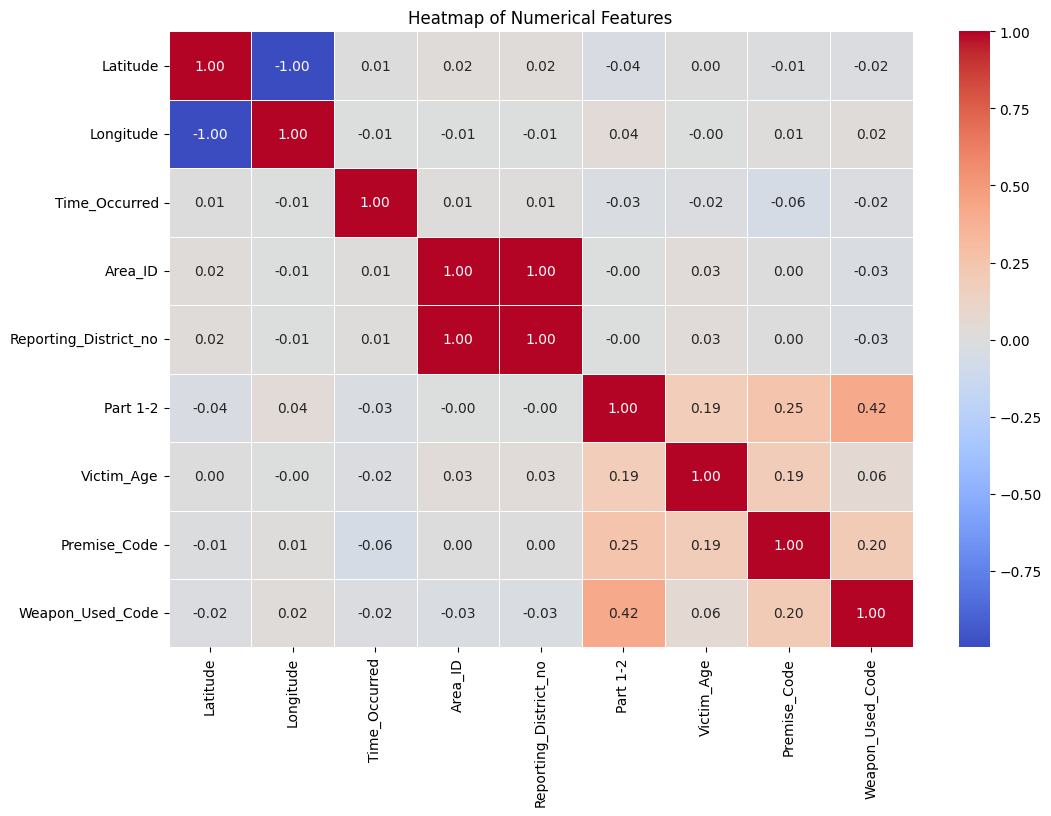

In [20]:
numerical_features = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Numerical Features')
plt.show()

# DATA PREPROCESSING

In [21]:
def data_features_preprocessor(data_features, multilabel_binarizer=None, preprocessing_pipeline=None, scaler=None, pca=None):
    # Handle invalid values
    data_features.Victim_Age = data_features.Victim_Age.apply(lambda x: np.nan if x < 0 else x)
    data_features.Victim_Sex = data_features.Victim_Sex.apply(lambda x: np.nan if x not in ["M", "F", "X"] else x)
    data_features.Date_Reported = pd.to_datetime(data_features.Date_Reported, format='%m/%d/%Y %I:%M:%S %p')
    data_features.Date_Occurred = pd.to_datetime(data_features.Date_Occurred, format='%m/%d/%Y %I:%M:%S %p')
    
    # Extract date features
    data_features['Reported_Year'] = data_features.Date_Reported.dt.year
    data_features['Reported_Month'] = data_features.Date_Reported.dt.month
    data_features['Reported_Day'] = data_features.Date_Reported.dt.day
    data_features['Reported_DayOfWeek'] = data_features.Date_Reported.dt.dayofweek
    data_features['Occurred_Year'] = data_features.Date_Occurred.dt.year
    data_features['Occurred_Month'] = data_features.Date_Occurred.dt.month
    data_features['Occurred_Day'] = data_features.Date_Occurred.dt.day
    data_features['Occurred_DayOfWeek'] = data_features.Date_Occurred.dt.dayofweek
    data_features.Time_Occurred = data_features.Time_Occurred.astype(int).astype(str).str.zfill(4)
    data_features['Occurred_Hour'] = data_features.Time_Occurred.str.slice(0, 2).astype(int)
    data_features['Occurred_Minute'] = data_features.Time_Occurred.str.slice(2, 4).astype(int)
    

    # Handle missing values
    data_features.Weapon_Used_Code = data_features.Weapon_Used_Code.astype(str)
    data_features.Weapon_Used_Code.replace('nan', np.nan, inplace=True)
    imputer_constant = SimpleImputer(strategy='constant', fill_value='Unknown')
    imputer_mode = SimpleImputer(strategy='most_frequent')
    imputer_constant_columns = ['Modus_Operandi', 'Weapon_Used_Code', 'Victim_Sex', 'Victim_Descent']
    imputer_mode_columns = ['Victim_Age']
    for current_column in imputer_constant_columns:
        data_features[[current_column]] = imputer_constant.fit_transform(data_features[[current_column]])
    for current_column in imputer_mode_columns:
        data_features[[current_column]] = imputer_mode.fit_transform(data_features[[current_column]])
    
    # Frequency encoding for the Location column
    location_freq = data_features['Location'].value_counts().to_dict()
    data_features['Location_frequency'] = data_features['Location'].map(location_freq)

    # Binarize multi-label features
    if multilabel_binarizer:
        data_features['Modus_Operandi'] = data_features['Modus_Operandi'].apply(lambda x: x.split())
        binarized_modus_operandi = multilabel_binarizer.transform(data_features['Modus_Operandi'])
        binarized_modus_operandi_cols = ['Modus_Operandi:' + name for name in multilabel_binarizer.classes_]
        binarized_modus_operandi_df = pd.DataFrame(binarized_modus_operandi, columns=binarized_modus_operandi_cols)
        data_features = data_features.join(binarized_modus_operandi_df)


    # Apply the preprocessing pipeline to one-hot encode categorical features
    if preprocessing_pipeline:
        data_features = pd.DataFrame(preprocessing_pipeline.transform(data_features), columns=preprocessing_pipeline.get_feature_names_out())

    # Drop unnecessary columns
    data_features.drop(columns=['remainder__Cross_Street', 'remainder__Date_Reported', 'remainder__Date_Occurred', 'remainder__Time_Occurred', 'remainder__Area_Name', 'remainder__Status_Description', 'remainder__Premise_Description','remainder__Location', 'remainder__Weapon_Description', 'remainder__Modus_Operandi'], inplace=True)
        
    # Convert categorical columns to 'category' type
    categorical_columns = data_features.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        data_features[col] = data_features[col].astype('category')

    # Encode categorical columns
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        data_features[col] = le.fit_transform(data_features[col])
        label_encoders[col] = le
    
    #Scale numeric features
    if scaler:
        numeric_columns = data_features.select_dtypes(include=[np.number]).columns
        data_features[numeric_columns] = scaler.fit_transform(data_features[numeric_columns])
    
    if pca:
        numeric_columns = data_features.select_dtypes(include=[np.number]).columns
        pca_features = pca.fit_transform(data_features[numeric_columns])
        pca_df = pd.DataFrame(pca_features, columns=[f'PCA_{i}' for i in range(pca.n_components_)])
        data_features = data_features.join(pca_df)
        data_features.drop(columns=numeric_columns, inplace=True)

    
    return data_features

In [22]:
# Preprocessing
data_features = data.drop("Crime_Category", axis=1)
data_labels = data['Crime_Category'].copy()

In [23]:
# Fit the encoders on the training data
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data_features['Modus_Operandi'].fillna('Unknown').apply(lambda x: x.split()))

MultiLabelBinarizer()

In [24]:
scaler= StandardScaler()

In [25]:
pca= PCA(n_components=0.95)

In [26]:
combined_data = pd.concat([data_features, test_data], axis=0)

In [27]:
# Fit the frequency encoder on the training data
location_freq = combined_data['Location'].value_counts().to_dict()
combined_data['Location_frequency'] = combined_data['Location'].map(location_freq)

In [28]:
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [29]:
# Specify the columns that need to be one-hot encoded
categorical_columns = ['Area_ID', 'Reporting_District_no', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status']

In [30]:
# Use ColumnTransformer to apply the pipeline only to categorical columns
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

In [31]:
preprocessing_pipeline.fit(combined_data)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Area_ID', 'Reporting_District_no',
                                  'Victim_Sex', 'Victim_Descent',
                                  'Premise_Code', 'Weapon_Used_Code',
                                  'Status'])])

In [32]:
# Preprocess the training data
data_features_transformed = data_features_preprocessor(data_features, multilabel_binarizer, preprocessing_pipeline,scaler, pca)

/tmp/ipykernel_18/3491728660.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_features.Weapon_Used_Code.replace('nan', np.nan, inplace=True)


In [33]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(data_features_transformed, data_labels, test_size=0.20, random_state=69)
len(X_train),len(X_val),len(y_train),len(y_val)

(16000, 4000, 16000, 4000)

# HYPERPARAMETER TUNING

In [34]:
# current_model = RandomForestClassifier(random_state=69)
# param_grid = {
#                 'n_estimators': [100, 300, 400, 600],
#                 'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.75],
#                 'max_depth': [None, 10, 30, 50],
#                 'min_samples_split': [2, 10, 20], 
#                 'min_samples_leaf': [1, 4, 6],
#                 'bootstrap': [True, False]
# }



# current_model = GradientBoostingClassifier()
# param_grid = {
#                 'n_estimators'：[100, 200, 300, 400],
#                 'learning_rate': [0.1, 0.05,0.025],
#                 'max_depth': [2, 3, 5, 7],
#                 'min_samples_split': [2, 5, 10]
#                 'min_samples_leaf': [1, 2, 4]
#                 'subsample': [0.75, 0.8, 0.85]
#                 'max_features': ['sqrt', 'log2']
#  }



# current_model = SVC()
# param_grid = {
#                 'C': [0.1, 1, 10],
#                 'gamma': [1, 0.1, 0.01],
#                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],                
#                 'degree': [2, 3, 4],
#                 'coef0': [0.0, 0.1, 1.0]
# }
          
          
# current_model = XGBClassifier()
# param_grid = {
#                 'n_estimators': [100, 200],
#                 'max_depth': [3, 4, 5],
#                 'learning_rate': [0.01, 0.1, 0.2],
#                 'subsample': [0.8, 1.0],
#                 'colsample_bytree': [0.8, 1.0].
#                 'gamma': [0, 0.1, 0.2], 
#                 'min_child weight': [1, 5, 10],
#                 'reg_alpha': [0, 0.1, 0.5], 
#                 'reg_lambda': [1, 1.5, 2],
#                 'scale_pos_weight': [1, 2, 3]
# }


# current_model = LogisticRegression()
# param_grid = {
#                 'penalty': ['11', '12', 'elasticnet', 'none'],
#                 'C': np.logspace(-4, 4, 20),
#                 'solver': ['bfgs', 'tiblinear', 'saga'], 
#                 'max_iter': [200, 500, 1000],
#                 'tol': [1e-4, 1e-3, 1e-2, 1e-1],
#                 'fit_intercept': [True, False]
#                 'class_weight': [None,'balanced']
# }
    
# randomize_search = RandomizedSearchCV(
#                                      estimator=current_model,
#                                      param_distributions=param_grid, 
#                                      n_iter=100, 
#                                      cv=2, 
#                                      n_jobs=-1
#                                 )

# randomize_search.fit(X_train, y_train)

# best_params = randomize_search.best_params_

# current_model.set_params (**best_params)
# best_score = randomize_search.best_score_

# y_pred_encoded = best_model. predict(X_val)
# y_pred = label_encoder. inverse_transform (y_pred_encoded)

# MODEL FITTING

# Random forest Classifier :  

evaluation score = 91.9%   

test score = 91.6%    

best_params = {
    'n_estimators': [500],
    'max_features': [0.25],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'bootstrap': [False]
}       

evaluation score after hyperparameters tuning: 94.3%  

In [35]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_features=0.25,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    bootstrap=False,
    random_state=69
)

# Gradient Boosting Classifier :  
evaluation score = 93.8%  

test score = 93.3%  

best_params = {
    'n_estimators': [700],
    'learning_rate': [0.1],
    'max_depth': [10],
    'min_samples_split': [3],
    'min_samples_leaf': [3],
    'subsample': [0.9],
    'max_features': ['sqrt']
}      

evaluation score after hyperparameters tuning: 94.2% 

In [36]:
gb = GradientBoostingClassifier(
    n_estimators=700,
    learning_rate=0.1,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=3,
    subsample=0.9,
    max_features='sqrt',
    random_state=69
)

# SVC Classifier :  
evaluation score =  58.9%   

test score = 58.6%   

best_params = {
    'tol': 0.001, 
    'shrinking': False, 
    'probability': True, 
    'kernel': 'linear', 'gamma': 0.15, 
    'degree': 1, 
    'coef0': 0.15, 
    'class_weight': None, 
    'C': 10}       

evaluation score after hyperparameters tuning:91.9%  

In [37]:
svc = SVC(
    tol=0.001,
    shrinking=False,
    probability=True,
    kernel='linear',
    gamma=0.15,
    degree=1,
    coef0=0.15,
    class_weight=None,
    C=10,
    random_state=69
)

# XGBoost Classifier :  
evaluation score = 95.4%   

test score = 95.14%     

best_params = {
    'n_estimators': [200],
    'max_depth': [5],
    'learning_rate': [0.15],
    'subsample': [1.0],
    'colsample_bytree': [0.8],
    'gamma': [0.15],
    'min_child_weight': [1],
    'reg_alpha': [0],
    'reg_lambda': [1.75],
    'scale_pos_weight': [3]
}        

evaluation score after hyperparameters tuning: 95.18%  

In [38]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.15,
    subsample=1.0,
    colsample_bytree=0.8,
    gamma=0.15,
    min_child_weight=1,
    reg_alpha=0,
    reg_lambda=1.75,
    scale_pos_weight=3,
    random_state=69
)

In [39]:
base_models = [
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
]

# Logistic Regression Classifier :  
evaluation score =  58.6%    

test score = 58.8%   

best_params = {
    'tol': 0.01,
    'solver': 'liblinear',
    'penalty': 'l1',
    'max_iter': 500,
    'fit_intercept': False,
    'class_weight': None,
    'C': 0.8286427728546842
}       

evaluation score after hyperparameters tuning: 93.7%   

In [40]:
meta_model = LogisticRegression(
    tol=0.01,
    solver='liblinear',
    penalty='l1',
    max_iter=500,
    fit_intercept=False,
    class_weight=None,
    C=0.8286427728546842,
    random_state=69
)

# Stacking Classifer

Evaluation Score: 95.7%

Test Score: 95.3%

In [41]:
# stacking_clf = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model,
#     verbose=3,
#     n_jobs=-1
# )

# MODEL PERFORMANCE INSIGHTS

**SCORE COMPARISON OF ALL MODELS**

In [42]:
scores = {
    'Classifier': [
        'Random Forest', 'Gradient Boosting', 'SVC', 'XGBoost', 'Logistic Regression'
    ],
    'Evaluation Score': [
        91.9, 93.8, 58.9, 95.4, 58.6
    ],
    'Test Score': [
        91.6, 93.3, 58.6, 95.14, 58.8
    ],
    'Best Score After Tuning': [
        94.3, 94.2, 91.9, 95.18, 93.7
    ]
}

df_score = pd.DataFrame(scores)

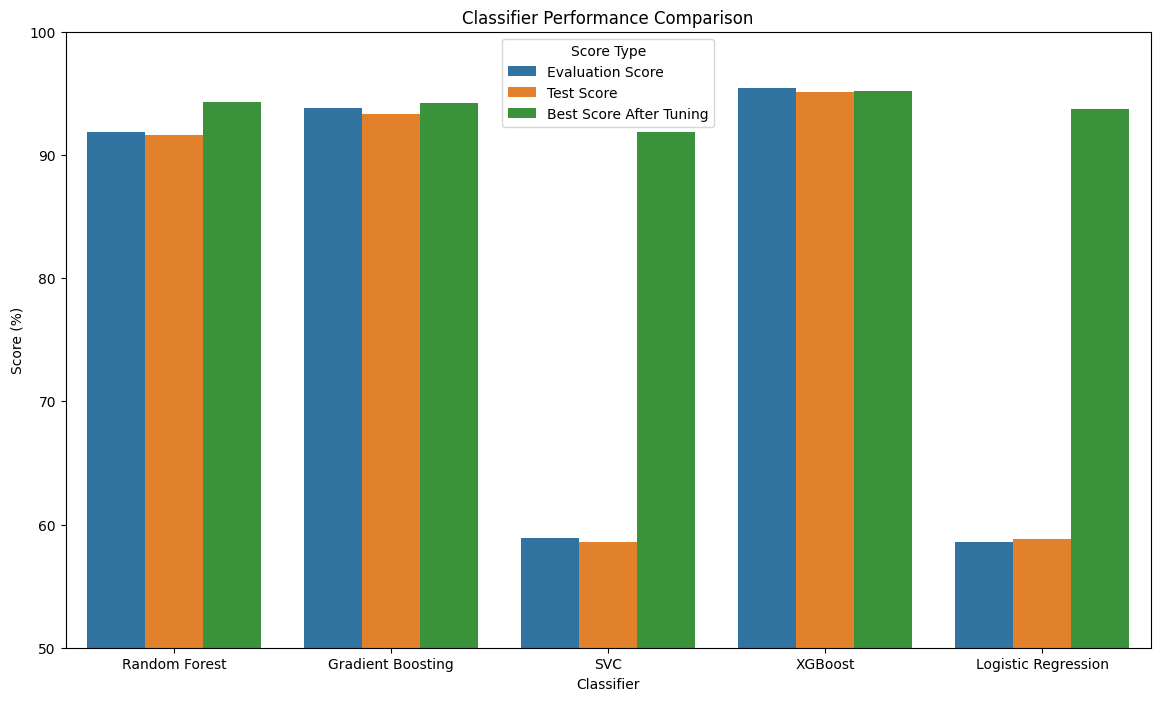

In [43]:
df_melted = df_score.melt(id_vars='Classifier', var_name='Score Type', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Classifier', y='Score', hue='Score Type', data=df_melted)
plt.title('Classifier Performance Comparison')
plt.xlabel('Classifier')
plt.ylabel('Score (%)')
plt.ylim(50, 100)
plt.legend(title='Score Type')
plt.show()

**STACKING VS TOP 3 MODELS**

In [44]:
score2 = {
    'Classifier': [
        'Random Forest', 'Gradient Boosting', 'XGBoost', 'Stacking'
    ],
    'Evaluation Score': [
        91.9, 93.8, 95.4, 95.7
    ],
    'Test Score': [
        91.6, 93.3, 95.14, 95.3
    ],
    'Best Score After Tuning': [
        94.3, 94.2, 95.18, 95.7 
    ]
}

score2_df = pd.DataFrame(score2)

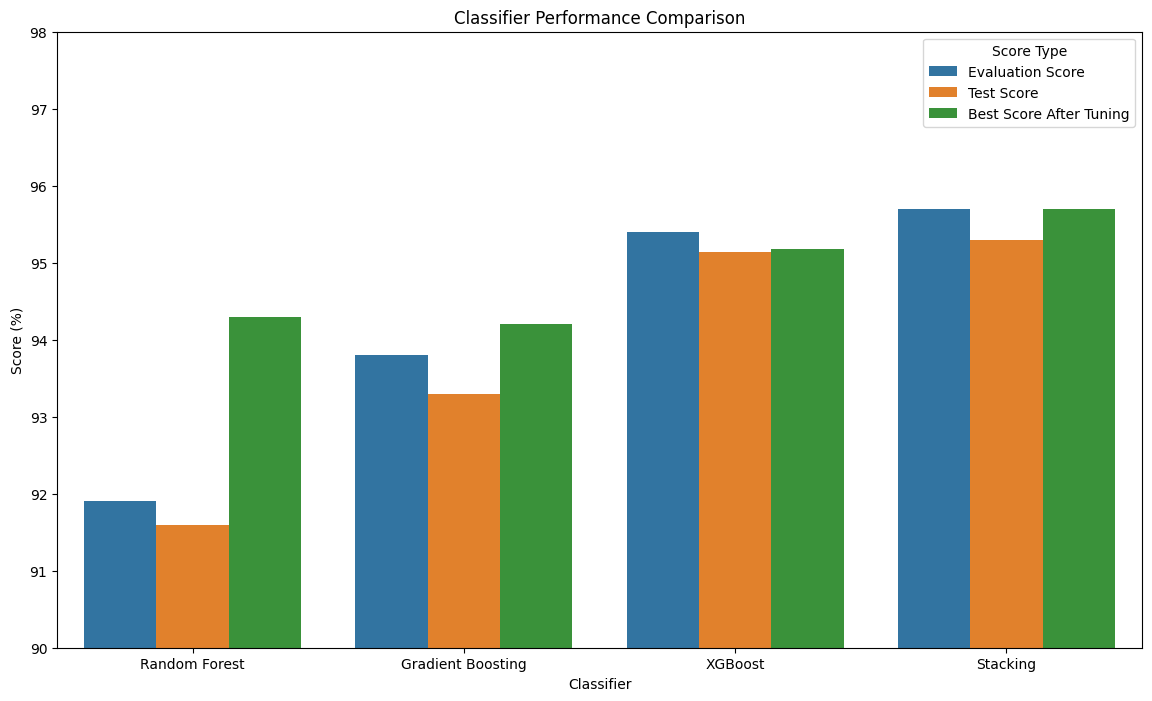

In [45]:
df_melted2 = score2_df.melt(id_vars='Classifier', var_name='Score Type', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Classifier', y='Score', hue='Score Type', data=df_melted2)
plt.title('Classifier Performance Comparison')
plt.xlabel('Classifier')
plt.ylabel('Score (%)')
plt.ylim(90, 98)
plt.legend(title='Score Type')
plt.show()

In [46]:
# Model training
# stacking_clf.fit(X_train, y_train)

In [47]:
# Model evaluation
# y_pred = stacking_clf.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Stacking Classifier Accuracy: {accuracy:.3f}')

In [48]:
# Test data preprocessing and prediction
# test_data_preprocessed = data_features_preprocessor(test_data, multilabel_binarizer, preprocessing_pipeline, pca)
# kaggle_y_predict = stacking_clf.predict(test_data_preprocessed)

In [49]:
# Submission
# submission = pd.DataFrame({'ID': range(1, len(kaggle_y_predict) + 1), 'Crime_Category': kaggle_y_predict})
# submission.to_csv('submission.csv', index=False)